## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
import matplotlib.pyplot as plt
import math as mt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sn
import math, random



In [2]:
dados = pd.read_csv("../../data/covtype.csv", sep=',', dtype='uint8')
# Elimine todas as colunas relativas aos atributos categóricos
for i in range(1, 41):
    dados = dados.drop(columns=['Soil_Type'+str(i)], axis=1)
for i in range(1, 5):
    dados = dados.drop(columns=['Wilderness_Area'+str(i)], axis=1)

x = dados.drop("Cover_Type", axis = 1)
x = np.array(x[0:])
y = dados['Cover_Type'].to_numpy()



In [3]:
class Architecture:
    accuracy_array = []
    f1_score_array = []
    y_pred_array = []
    y_real_array = []
    config_array = []
    best_config  = []
    accuracy_array_loop = []
    f1_score_array_loop = []
    y_real_array_loop   = []
    y_pred_array_loop   = []


    def __init__(self,x,y, epochs, activation_functions, optimizer, neurons, config_number, config):
        self.x              = None
        self.x              = x
        self.X_train_std    = []
        self.X_test_std     = []
        self.y_train        = []
        self.y_test         = []
        self.y_pred         = []
        self.y              =None 
        self.y              = y
        self.accuracy       = 0
        self.config         = config
        self.f1_score       = 0
        self.config_number  = config_number
        self.epochs         = epochs
        self.activation     = activation_functions
        self.optimizer      = optimizer
        self.neurons        = neurons
        self.network        = MLPClassifier( hidden_layer_sizes=neurons, 
                                                activation=activation_functions, 
                                                solver=optimizer, 
                                                max_iter=epochs, 
                                                verbose=False, 
                                                random_state=1 )  
    
    def split_normalize_dataset(self):
        X_train, X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.3, train_size=0.7 )
        self.X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        self.X_test_std =  (X_test  - np.mean(X_train))/np.std(X_train)   
    
    def training(self):
        self.model = self.network.fit(self.X_train_std, self.y_train)

    def running_prevision(self):
        self.y_pred = self.model.predict(self.X_test_std)
        self.y_pred_array.append(self.y_pred)
        self.y_real_array.append(self.y_test)
       

    def running_statistics(self):
        self.accuracy =  accuracy_score(self.y_test, self.y_pred)
        self.f1_score =  f1_score(self.y_test, self.y_pred, average='macro')
        self.accuracy_array.append(self.accuracy)
        self.f1_score_array.append(self.f1_score)
        
    def save_best_accuracy(self):
        top = sorted(zip(self.accuracy_array, self.f1_score_array), reverse=True)[:1]
        _1_index_y_pred = self.accuracy_array.index(top[0][0])
        _1_index_y_real = self.accuracy_array.index(top[0][0])
        
        self.y_pred_array_loop.append(self.y_pred_array[_1_index_y_pred])
        self.y_real_array_loop.append(self.y_real_array[_1_index_y_real])

        self.accuracy_array_loop.append(top[0][0])
        self.f1_score_array_loop.append(top[0][1])

        self.config_array.append(self)

        for i in range(15):
            self.accuracy_array.pop()
            self.f1_score_array.pop()
        
        
    def show(self):
        print('\n\n----- Configuração ----- ', self.config_number,
                '\n-- Omtimizador :', self.optimizer,
                '\n-- Épocas :', self.epochs,
                '\n-- Camadas/neuronios :', self.neurons,
                '\n-- Função de ativação :', self.activation)
        print('-> Acurácia: ', self.accuracy)
        print('-> F1-score: ', self.f1_score,'\n')
    
    def del_params(self):
        del self.accuracy_array[:]
        del self.f1_score_array[:]
        del self.y_pred_array[:]
        del self.y_real_array[:]
        del self.config_array[:]
        del self.best_config[:]
        del self.accuracy_array_loop[:]
        del self.f1_score_array_loop[:]
        del self.y_real_array_loop[:]
        del self.y_pred_array_loop[:]
        
        
    
    def show_top3(self):
        top3 = sorted(zip(self.accuracy_array_loop, self.f1_score_array_loop), reverse=True)[:3]
        _1 = self.accuracy_array_loop.index(top3[0][0])
        _2 = self.accuracy_array_loop.index(top3[1][0])
        _3 = self.accuracy_array_loop.index(top3[2][0])
        index_top3 = [_1,_2,_3]
        cont = 1
        print("Y real"+str(len(self.y_real_array_loop)))
        print("Y pred"+str(len(self.y_pred_array_loop)))
        print("accuracy loop"+str(len(self.accuracy_array_loop)))
        print("f1score loop"+str(len(self.f1_score_array_loop)))
        print(index_top3)

        for i in index_top3:
            results_df = pd.DataFrame.from_dict({'real': self.y_real_array_loop[i], 'previsto': self.y_pred_array_loop[i]})
            mc = pd.crosstab(results_df['real'], results_df['previsto'], rownames=['Real'], colnames=['Previsto'])
            sn.heatmap(mc, annot=True, fmt="d")
            plt.title('Configuração TOP: ' +str(cont)+
                      '\nHiperparâmetros: '+str(self.config[i])+
                      '\nAcurácia: '+str(self.accuracy_array_loop[i])+
                      '\nF-score: '+str(self.f1_score_array_loop[i]))
            plt.show()
            cont+=1
        self.del_params()
        return index_top3

    def box_plot(self):
        pd.DataFrame( self.f1_score_array_loop, columns = ['F-Score']).boxplot().set_title('F-Score das 6 arquiteturas')     

        

In [4]:
#1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
config_aleatorio = [  ['sgd',  100,(20,),   'relu'], ['sgd',  100,(10,10), 'relu'], ['sgd',  150,(100,),  'relu'],
           ['sgd',  150,(5,5), 'relu'], ['sgd',  200,(7,10),   'relu'], ['sgd',  200,(10,5), 'relu'],
           ['adam', 100,(30,),   'tanh'], ['adam', 150,(25,3), 'tanh'], ['adam', 200,(5,10), 'tanh'],
           ['adam', 100,(20,5), 'tanh']]

# config_aleatorio = [['sgd',  5,(20,),   'relu'], ['sgd',  5,(10,10), 'relu'], ['sgd',  5,(100,),  'relu'],
#             ['sgd',  5,(5,5), 'relu'], ['sgd',  5,(7,10),   'relu'], ['sgd',  5,(10,5), 'relu'],
#             ['adam', 5,(30,),   'tanh'], ['adam', 5,(25,3), 'tanh'], ['adam', 5,(5,10), 'tanh'],
#             ['adam', 5,(20,5), 'tanh']]

for i in range(len(config_aleatorio)):
    print('\n\n--> Configuração',i,'\nOtimizador: ',config_aleatorio[i][0],'\nÉpocas:',config_aleatorio[i][1],'\nCamada oculta:',config_aleatorio[i][2],'\nFunção de ativação:',config_aleatorio[i][3])



--> Configuração 0 
Otimizador:  sgd 
Épocas: 100 
Camada oculta: (20,) 
Função de ativação: relu


--> Configuração 1 
Otimizador:  sgd 
Épocas: 100 
Camada oculta: (10, 10) 
Função de ativação: relu


--> Configuração 2 
Otimizador:  sgd 
Épocas: 150 
Camada oculta: (100,) 
Função de ativação: relu


--> Configuração 3 
Otimizador:  sgd 
Épocas: 150 
Camada oculta: (5, 5) 
Função de ativação: relu


--> Configuração 4 
Otimizador:  sgd 
Épocas: 200 
Camada oculta: (7, 10) 
Função de ativação: relu


--> Configuração 5 
Otimizador:  sgd 
Épocas: 200 
Camada oculta: (10, 5) 
Função de ativação: relu


--> Configuração 6 
Otimizador:  adam 
Épocas: 100 
Camada oculta: (30,) 
Função de ativação: tanh


--> Configuração 7 
Otimizador:  adam 
Épocas: 150 
Camada oculta: (25, 3) 
Função de ativação: tanh


--> Configuração 8 
Otimizador:  adam 
Épocas: 200 
Camada oculta: (5, 10) 
Função de ativação: tanh


--> Configuração 9 
Otimizador:  adam 
Épocas: 100 
Camada oculta: (20, 5) 
Função

In [5]:
# 2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 15 vezes

for i in range(len(config_aleatorio)):
    for j in range(15):
        network = Architecture( x,y,config_aleatorio[i][1],config_aleatorio[i][3],config_aleatorio[i][0],config_aleatorio[i][2], i, config_aleatorio )
        network.split_normalize_dataset()
        network.training()
        network.running_prevision()
        network.running_statistics()
        network.show()
    network.save_best_accuracy()
  




----- Configuração -----  0 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.49741256655039473
-> F1-score:  0.1537031753004843 



----- Configuração -----  0 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.4973494584174775
-> F1-score:  0.15744248993157356 



----- Configuração -----  0 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.4976191022581237
-> F1-score:  0.16101457389467638 



----- Configuração -----  0 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.499368918670828
-> F1-score:  0.16203146008381575 



----- Configuração -----  0 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.49842229667706994
-> F1-score:  0.15241634591624625 



----- Co

Y real10
Y pred10
accuracy loop10
f1score loop10
[2, 6, 9]


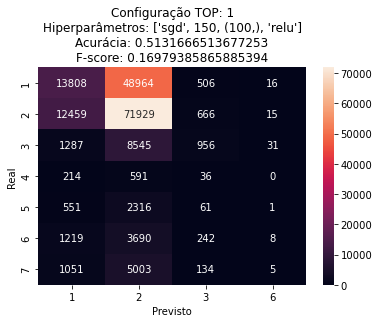

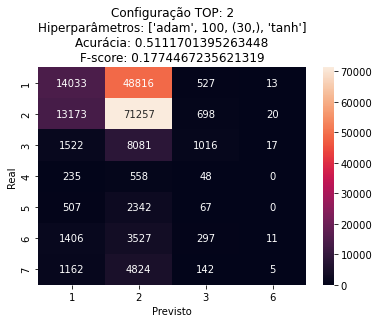

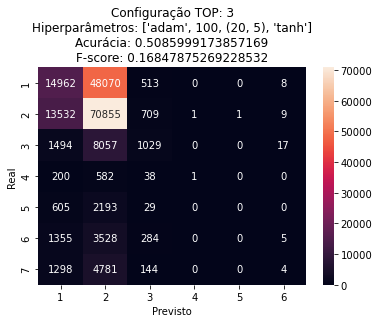

In [6]:
#3. Como resultado da avaliação, apresente:  
#    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
#    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn 
top3_aleatorio = network.show_top3()


## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 


2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia

In [9]:
# 1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e 
# obtenha os valores de $N_i$ e $N_o$.
# Resposta: 
# O valor de 'Ni' corresponde a quantidade de atributos preditores do problema, sendo então o valor 10.
# O valor de 'No' corresponde aos tipos de respostas que a rede poderá prever, neste problema de classificação multiclasse, 'No' tem valor 7.
# O valor de 'Nh' portanto correspondente a: 
# Alph*Raiz('Ni'*'No') -----> Alph*math.sqrt(10*7) -----> Alph*math.sqrt(70)
# Logo, Nh possui 3 valores pois depende de Alph
x1 = dados.drop("Cover_Type", axis = 1)
y1 = dados.Cover_Type

Ni = len(x1.columns)
No = len(y1.value_counts())
alfa = [0.5, 2, 3]
nh =  [ int(alfa[0]*math.sqrt(Ni*No)), int(alfa[1]*math.sqrt(Ni*No)), int(alfa[2]*math.sqrt(Ni*No)) ] 


print('O valor de Ni =', Ni)
print('O valor de No =', No)
print('O valor de Nh para alfa=0.5 ,', nh[0])
print('O valor de Nh para alfa=2   ,', nh[1])
print('O valor de Nh para alfa=3   ,', nh[2])


O valor de Ni = 10
O valor de No = 7
O valor de Nh para alfa=0.5 , 4
O valor de Nh para alfa=2   , 16
O valor de Nh para alfa=3   , 25


In [ ]:
# 3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  

config_piramide = []
epochs = [100, 70, 80, 60, 50, 40]
#epochs = [4, 4, 4, 4, 4, 4]

activation_functions = ['relu', 'tanh','identity']
optimizer = ['adam','sgd']


#Gerando aleatoriamente as 30 arquiteturas com os dados encontrados.
for i in range(10):
        config_piramide.append([ optimizer[random.randrange(0,len(optimizer))], 
                              epochs[random.randrange(0,len(epochs))], 
                              (nh[random.randrange(0,len(nh))],), 
                              activation_functions[random.randrange(0,len(activation_functions))]])

print('Quantidade de arquiteturas: ',len(config_piramide))

for i in range(len(config_piramide)):
    for j in range(15):
        network2 = Architecture( x,y,config_piramide[i][1],config_piramide[i][3],config_piramide[i][0],config_piramide[i][2], i, config_piramide )
        network2.split_normalize_dataset()
        network2.training()
        network2.running_prevision()
        network2.running_statistics()
        network2.show()
    network2.save_best_accuracy()

    


In [ ]:
#    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia
top3_piramide = network2.show_top3()


In [ ]:
#Juntaremos as 3 tops redes neurais do exercicio passado e do estudo das camadas ocultas usando a regra da pirâmide
config_full = []
config_full.append( config_aleatorio[ top3_aleatorio[0] ]  )
config_full.append( config_aleatorio[ top3_aleatorio[1] ]  )
config_full.append( config_aleatorio[ top3_aleatorio[2] ]  )
config_full.append( config_piramide[ top3_piramide[0] ])
config_full.append( config_piramide[ top3_piramide[1] ])
config_full.append( config_piramide[ top3_piramide[2] ])

In [ ]:
# 2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições

new_dados = pd.read_csv("../../data/covtype.csv", sep=',', dtype='uint8')
new_x = new_dados.drop(columns=['Cover_Type'])
new_x = np.array(new_x[0:])
new_y = new_dados['Cover_Type'].to_numpy()





In [ ]:
for i in range(len(config_full)):
    for j in range(15):
        network3 = Architecture( new_x,new_y,config_full[i][1],config_full[i][3],config_full[i][0],config_full[i][2], i, config_full )
        network3.split_normalize_dataset()
        network3.training()
        network3.running_prevision()
        network3.running_statistics()
        network3.show()
    network3.save_best_accuracy()

In [ ]:
network3.box_plot()